# Exercise 4 Neural Network Learning

In [6]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_5/ex4/'
sys.path.append(path_to_modules)
from predict import predict
from displayData import displayData
from nnCostFunction import nnCostFunction
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from checkNNGradients import checkNNGradients


import scipy.optimize as op
import matplotlib.pyplot as plt
import numpy as np

## Setup the parameters you will use for this exercise

In [7]:
input_layer_size  = 400   # 20x20 Input Images of Digits
hidden_layer_size = 25    # 25 hidden units
num_labels = 10           # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

##  Part 1: Loading and Visualizing Data 
  We start the exercise by first loading and visualizing the dataset.
  You will be working with a dataset that contains handwritten digits.

Loading and Visualizing Data ...



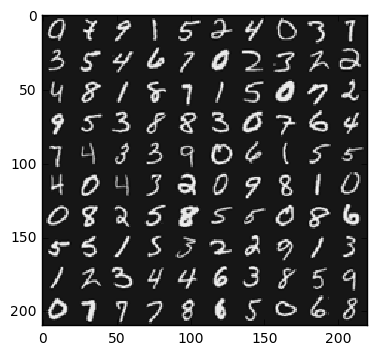

In [8]:
# Load Training Data
print('Loading and Visualizing Data ...\n')

X = np.loadtxt(path_to_modules + 'ex4_features.csv', delimiter =",")
m,_ = X.shape

y = np.loadtxt(path_to_modules + 'ex4_labels.csv', delimiter =",").reshape(m, 1)


#Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100)

displayData(X[rand_indices])

plt.draw()
plt.show(block=False)

## Part 2: Loading Pameters
 In this part of the exercise, we load some pre-initialized
 neural network parameters.

In [9]:
print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2

Theta1 = np.loadtxt(path_to_modules + 'Theta1.csv', delimiter =",")
Theta2 = np.loadtxt(path_to_modules + 'Theta2.csv', delimiter =",")

# Unroll parameters
nn_params = np.r_[Theta1.ravel(), Theta2.ravel()]


Loading Saved Neural Network Parameters ...



## Part 3: Compute Cost (Feedforward) 
  To the neural network, you should first start by implementing the
  feedforward part of the neural network that returns the cost only. You
  should complete the code in nnCostFunction.m to return cost. After
  implementing the feedforward to compute the cost, you can verify that
  your implementation is correct by verifying that you get the same cost
  as us for the fixed debugging parameters.

  We suggest implementing the feedforward cost *without* regularization
  first so that it will be easier for you to debug. Later, in part 4, you
  will get to implement the regularized cost.

In [10]:
print('\nFeedforward Using Neural Network ...\n')

# Weight regularization parameter (we set this to 0 here).
reg_lambda = 0;

J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_lambda)

print('Cost at parameters (loaded from ex4weights) should be about 10.4414339388 \n', J)


Feedforward Using Neural Network ...

Cost at parameters (loaded from ex4weights) should be about 10.4414339388 
 10.4414339388


../../algorithms_in_python/week_5/ex4\nnCostFunction.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i, 0]]= 1


## Part 4: Implement Regularization
  Once your cost function implementation is correct, you should now
  continue to implement the regularization with the cost.

In [11]:
print('\nChecking Cost Function (w/ Regularization) ... \n')

# Weight regularization parameter (we set this to 1 here).
reg_lambda = 1

J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_lambda)

print('Cost at parameters (loaded from ex4weights): should be about 10.5375744448 ', J)


Checking Cost Function (w/ Regularization) ... 

Cost at parameters (loaded from ex4weights): should be about 10.5375744448  10.5375744448


../../algorithms_in_python/week_5/ex4\nnCostFunction.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i, 0]]= 1


## Part 5: Sigmoid Gradient 
  Before you start implementing the neural network, you will first
  implement the gradient for the sigmoid function. You should complete the
  code in the sigmoidGradient.py file.

In [12]:
print('\nEvaluating sigmoid gradient...\n')

test_array = np.array([[1, -0.5, 0, 0.5, 1]])
g = sigmoidGradient(test_array)
print('Sigmoid gradient evaluated at [1 -0.5 0 0.5 1]:\n ')
print(g)
print('\n\n')


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [1 -0.5 0 0.5 1]:
 
[[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]]





## Part 6: Initializing Pameters 
  In this part of the exercise, you will be starting to implment a two
  layer neural network that classifies digits. You will start by
  implementing a function to initialize the weights of the neural network
  (randInitializeWeights.m)

In [13]:
print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.r_[initial_Theta1.ravel(), initial_Theta2.ravel()]

print("init nn params shape", initial_nn_params.shape)


Initializing Neural Network Parameters ...

init nn params shape (10285,)


## Part 7: Implement Backpropagation
  Once your cost matches up with ours, you should proceed to implement the
  backpropagation algorithm for the neural network. You should add to the
  code you've written in nnCostFunction.m to return the partial
  derivatives of the parameters.

In [14]:
print('\nChecking Backpropagation... \n')

#  Check gradients by running checkNNGradients
checkNNGradients()


Checking Backpropagation... 

[  6.90654083e-03  -1.10852709e-04   1.43851837e-04   2.66299665e-04
   1.21251043e-02  -4.29822000e-05   1.51666186e-04   2.06873381e-04
   6.19847901e-03   6.41872688e-05   2.03012229e-05  -4.22496704e-05
  -5.42355683e-03   1.12549716e-04  -1.30018476e-04  -2.53048280e-04
  -1.20761029e-02   5.72000558e-05  -1.60500355e-04  -2.30637482e-04
   1.02286353e-01   5.09594910e-02   4.96506204e-02   5.32772700e-02
   4.98448914e-02   5.07054723e-02   9.95931723e-02   5.02316727e-02
   4.78387283e-02   5.19209996e-02   4.89765403e-02   4.87430345e-02
   2.96932422e-01   1.48332515e-01   1.42655642e-01   1.56192660e-01
   1.44170901e-01   1.46349534e-01] [  6.90654084e-03  -1.10852710e-04   1.43851834e-04   2.66299665e-04
   1.21251043e-02  -4.29822018e-05   1.51666187e-04   2.06873383e-04
   6.19847902e-03   6.41872658e-05   2.03012235e-05  -4.22496701e-05
  -5.42355683e-03   1.12549718e-04  -1.30018475e-04  -2.53048282e-04
  -1.20761029e-02   5.72000571e-05  

## Part 8: Implement Regularization
  Once your backpropagation implementation is correct, you should now
  continue to implement the regularization with the cost and gradient.

In [15]:
print('\nChecking Backpropagation (w/ Regularization) ... \n')

#  Check gradients by running checkNNGradients
reg_lambda = 3;
checkNNGradients(reg_lambda)

# Also output the costFunction debugging values
debug_J, grad  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_lambda)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = 10): #f ', 
         '\n(this value should be about 0.576051)\n\n', debug_J)


Checking Backpropagation (w/ Regularization) ... 

[ 0.00690654  0.05037741  0.0547017   0.0087335   0.0121251  -0.05757844
 -0.01661326  0.03962607  0.00619848  0.0247913  -0.03262097 -0.06004166
 -0.00542356  0.02532257  0.05930642  0.03876422 -0.0120761  -0.05762665
 -0.04521974  0.008762    0.10228635  0.10144775  0.10420847  0.06174447
  0.00443674 -0.00682998  0.09959317  0.08965087  0.10720022  0.07664811
  0.01633527 -0.01125638  0.29693242  0.17354254  0.20209208  0.19520993
  0.1268967   0.08866568] [ 0.00690654  0.05037741  0.0547017   0.0087335   0.0121251  -0.05757844
 -0.01661326  0.03962607  0.00619848  0.0247913  -0.03262097 -0.06004166
 -0.00542356  0.02532257  0.05930642  0.03876422 -0.0120761  -0.05762665
 -0.04521974  0.008762    0.10228635  0.10144775  0.10420847  0.06174447
  0.00443674 -0.00682998  0.09959317  0.08965087  0.10720022  0.07664811
  0.01633527 -0.01125638  0.29693242  0.17354254  0.20209208  0.19520993
  0.1268967   0.08866568]
The above two column

../../algorithms_in_python/week_5/ex4\nnCostFunction.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i, 0]]= 1


## Part 8: Training NN
  You have now implemented all the code necessary to train a neural
  network. To train your neural network, we will now use "fmincg", which
  is a function which works similarly to "fminunc". Recall that these
  advanced optimizers are able to train our cost functions efficiently as
  long as we provide them with the gradient computations.

In [16]:
print('\nTraining Neural Network... \n')

#  You should also try different values of lambda
reg_lambda = 1;

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
max_iter = 200

# Short hand for cost function
costFunc = lambda params: nnCostFunction(params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_lambda,
                                         returnOnlyCost=True)
gradFunc = lambda params: nnCostFunction(params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_lambda, 
                                         returnOnlyGrad=True, flattenResult=True)

# Run fmincg to obtain the optimal theta
Result = op.minimize(fun = costFunc, x0 = initial_nn_params, method = 'TNC', jac = gradFunc, 
                     options={'maxiter' : max_iter, 'disp': True})

optimal_nn_params = Result.x

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(optimal_nn_params[0:hidden_layer_size * (input_layer_size + 1)], (hidden_layer_size, input_layer_size + 1))
Theta2 = np.reshape(optimal_nn_params[(hidden_layer_size * (input_layer_size + 1)):], (num_labels, hidden_layer_size + 1))

print('\n Neural Network trained successfully... \n')


Training Neural Network... 



../../algorithms_in_python/week_5/ex4\nnCostFunction.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i, 0]]= 1



 Neural Network trained successfully... 



## Part 9: Visualize Weights
  You can now "visualize" what the neural network is learning by
  displaying the hidden units to see what features they are capturing in
  the data.


Visualizing Neural Network... 



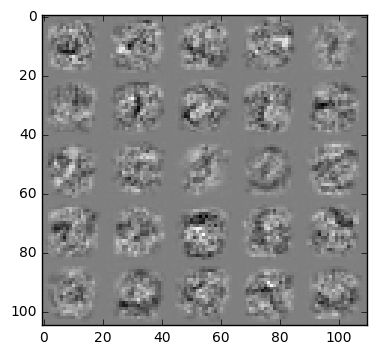

In [17]:
print('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:])
plt.draw()
plt.show(block=False)

## Part 10: Implement Predict
  After training the neural network, we would like to use it to predict
  the labels. You will now implement the "predict" function to use the
  neural network to predict the labels of the training set. This lets
  you compute the training set accuracy.

In [18]:
p = predict(Theta1, Theta2, X).reshape(m, 1)


rand_indices = np.random.choice(m, 5)

print(p[rand_indices])
print(y[rand_indices])

print('\nTraining Set Accuracy: ', np.multiply(np.mean((p == y).astype(int)), 100), '\n')

[[7]
 [1]
 [5]
 [9]
 [7]]
[[ 7.]
 [ 1.]
 [ 5.]
 [ 9.]
 [ 7.]]

Training Set Accuracy:  98.94 



##  To give you an idea of the network's output, you can also run
  through the examples one at the a time to see what it is predicting.


Displaying Example Image



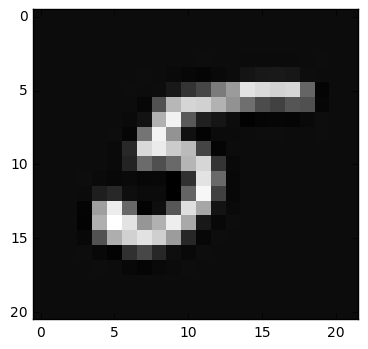


Neural Network Prediction:  [5] %
Paused - press enter to continue, q to exit:a

Displaying Example Image



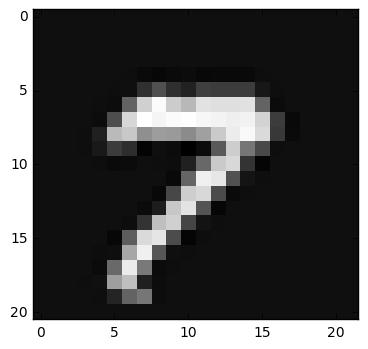


Neural Network Prediction:  [7] %
Paused - press enter to continue, q to exit:e

Displaying Example Image



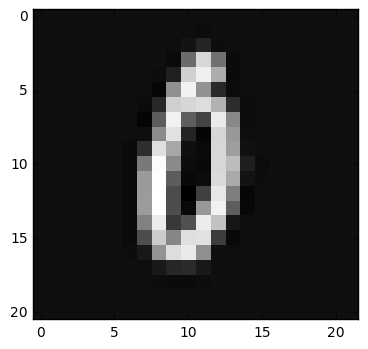


Neural Network Prediction:  [0] %
Paused - press enter to continue, q to exit:g

Displaying Example Image



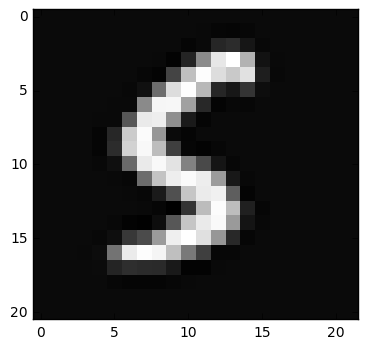


Neural Network Prediction:  [5] %
Paused - press enter to continue, q to exit:q


In [19]:
#  Randomly permute examples
rand_indices = np.random.choice(m, 600)

for i in range(600):
    # Display 
    print('\nDisplaying Example Image\n')
    imageData = X[rand_indices[i]].reshape(400, 1).T
    displayData(imageData)
    plt.draw()
    plt.show(block=False)
    pred = predict(Theta1, Theta2, imageData)
    print('\nNeural Network Prediction: ', pred, '%')

    # Pause with quit option
    s = input('Paused - press enter to continue, q to exit:')
    if s == 'q':
      break